In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("bank churn train.csv")

In [3]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0


In [4]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,100001.000000,1.000010e+05,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000
mean,50000.000000,1.569192e+07,656.484745,38.112173,5.027480,55543.233967,1.554044,0.755362,0.497465,112538.722655,0.211068
std,28867.946472,7.138503e+04,80.277631,8.832951,2.806896,62783.983783,0.547633,0.429874,0.499996,50345.231280,0.408068
min,0.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,25000.000000,1.563298e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74564.410000,0.000000
50%,50000.000000,1.569016e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,118022.820000,0.000000
75%,75000.000000,1.575667e+07,710.000000,42.000000,7.000000,119839.690000,2.000000,1.000000,1.000000,155407.210000,0.000000
max,100000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [5]:
df.shape

(100001, 14)

In [6]:
print(df.isnull().sum())

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [7]:
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
# How many columns with object
sum(df.dtypes =='object')

3

In [9]:
df.columns[df.dtypes == 'object']

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [10]:
df=df.replace("Male",0)
df=df.replace("Female",1)

In [11]:
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender               int64
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
df=df.replace("France",0)
df=df.replace("Spain",1)
df=df.replace("Germany",2)

In [14]:
sum(df.dtypes=="object")

1

In [15]:
df.columns[df.dtypes=="object"]

Index(['Surname'], dtype='object')

In [16]:
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography            int64
Gender               int64
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [17]:
df.shape

(100001, 14)

In [18]:
df['id'].unique()  #so we can't use id column because all the elements are unique  

array([     0,      1,      2, ...,  99998,  99999, 100000], dtype=int64)

In [19]:
##Here id, CustomerId and Surname columns are not important

df=df[["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary", "Exited"]]

In [20]:
df.shape

(100001, 11)

In [21]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [22]:
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,0,33.0,3,0.00,2,1,0,181449.97,0
1,627,0,0,33.0,1,0.00,2,1,1,49503.50,0
2,678,0,0,40.0,10,0.00,2,1,0,184866.69,0
3,581,0,0,34.0,2,148882.54,1,1,1,84560.88,0
4,716,1,0,33.0,5,0.00,2,1,1,15068.83,0


In [24]:
df["Exited"].value_counts()

Exited
0    78894
1    21107
Name: count, dtype: int64

<Axes: xlabel='Exited'>

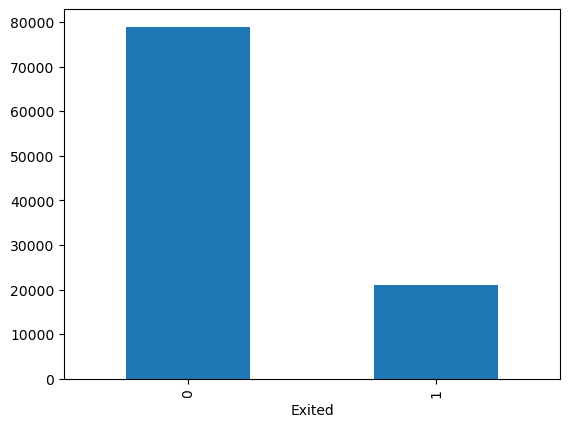

In [25]:
# Plot of Count
df['Exited'].value_counts().plot(kind='bar')

In [26]:
X = df.drop('Exited', axis=1)   
y = df['Exited']        

In [27]:
### Apply the algorithm to balance the data set
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='class')], axis=1)

In [28]:
df_resampled.shape

(157788, 11)

In [29]:
df=df_resampled

In [30]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,class
0,668,0,0,33.0,3,0.00,2,1,0,181449.97,0
1,627,0,0,33.0,1,0.00,2,1,1,49503.50,0
2,678,0,0,40.0,10,0.00,2,1,0,184866.69,0
3,581,0,0,34.0,2,148882.54,1,1,1,84560.88,0
4,716,1,0,33.0,5,0.00,2,1,1,15068.83,0


In [31]:
df.shape

(157788, 11)

In [32]:
# Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [33]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred1=clf.predict(X_test)
acc1=accuracy_score(y_test,y_pred1)
print(f"CLF Accuracy: {acc1:.2f}")

CLF Accuracy: 0.92


In [34]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred2=knn.predict(X_test)
acc2=accuracy_score(y_test,y_pred2)
print(f"KNN Accuracy: {acc2:.2f}")


KNN Accuracy: 0.70


In [35]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred3=lr.predict(X_test)
acc3=accuracy_score(y_test,y_pred3)
print(f"LR Accuracy: {acc3:.2f}")

LR Accuracy: 0.68


In [36]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred4=rf.predict(X_test)
acc4=accuracy_score(y_test,y_pred4)
print(f"RF Accuracy: {acc4:.2f}")

RF Accuracy: 0.94


In [37]:
# Display classification report
print("Classification Report:")
print("\nDecision Tree Classifier\n")
print(classification_report(y_test, y_pred1))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred1))
print("\nKNeighbors Classifier\n")
print(classification_report(y_test, y_pred2))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred2))
print("\nLogistic Regression\n")
print(classification_report(y_test, y_pred3))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred3))
print("\nRandom Forest Classifier\n")
print(classification_report(y_test, y_pred4))
print("\nConfusion Matrix:\n",confusion_matrix(y_test,y_pred4))

Classification Report:

Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.98      0.86      0.91     15772
           1       0.87      0.98      0.92     15786

    accuracy                           0.92     31558
   macro avg       0.93      0.92      0.92     31558
weighted avg       0.93      0.92      0.92     31558


Confusion Matrix:
 [[13492  2280]
 [  297 15489]]

KNeighbors Classifier

              precision    recall  f1-score   support

           0       0.76      0.60      0.67     15772
           1       0.67      0.81      0.73     15786

    accuracy                           0.70     31558
   macro avg       0.71      0.70      0.70     31558
weighted avg       0.71      0.70      0.70     31558


Confusion Matrix:
 [[ 9425  6347]
 [ 2970 12816]]

Logistic Regression

              precision    recall  f1-score   support

           0       0.68      0.68      0.68     15772
           1       0.68      0.68      

In [38]:
# since only two algorithm gives the best accuracy 
# therefore we makes two models based on that algorithm

In [39]:
# Using Joblib
import joblib

In [40]:
model_file1= open("Decision_tree_classifier.pkl","wb")
joblib.dump(clf,model_file1)
model_file1.close()

In [41]:
model_file3= open("Random_forest_classifier.pkl","wb")
joblib.dump(rf,model_file3)
model_file3.close()